In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\smailey\Desktop\lecture\csv\income.csv")

In [3]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.shape

(22, 3)

In [5]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [7]:
df.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90704.545455
std,5.901060,43953.075382
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [8]:
df.drop('Name',axis=1,inplace=True)

In [9]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


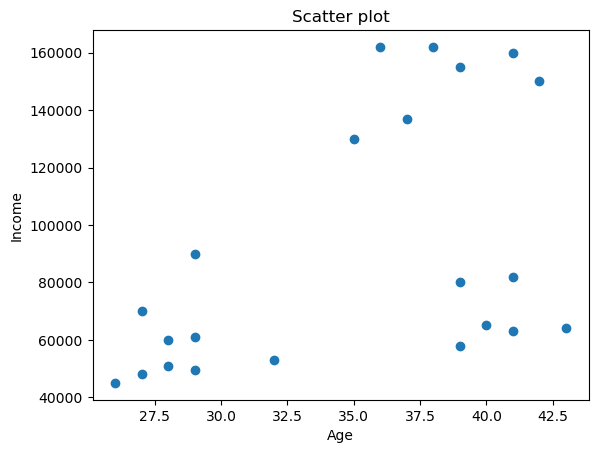

In [10]:
plt.scatter(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter plot')
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()


In [33]:
df['Age'] = scaler.fit_transform(df[['Age']])

In [34]:
df['Income'] = scaler.fit_transform(df[['Income']])

In [35]:
model = KMeans(n_clusters=3)

In [36]:
model.fit(df[['Age']],df['Income'])

C:\Users\smailey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\smailey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [37]:
df['cluster'] = model.predict(df[['Age']],df['Income'])
df['cluster']

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    0
16    2
17    2
18    2
19    2
20    2
21    2
Name: cluster, dtype: int32

In [38]:
df.head()

,Age,Income,cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [39]:
df0 = df[df['cluster'] ==0] 

In [40]:
df0

,Age,Income,cluster
8,0.588235,1.000000,0
9,0.529412,0.726496,0
10,0.647059,0.786325,0
15,0.352941,0.068376,0


In [41]:
df1 = df[df['cluster'] ==1] 
df2 = df[df['cluster'] ==2] 

In [42]:
df1

,Age,Income,cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
11,0.000000,0.000000,1
12,0.058824,0.025641,1
13,0.117647,0.051282,1
14,0.176471,0.038462,1


In [43]:
df2

,Age,Income,cluster
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2
21,0.764706,0.111111,2


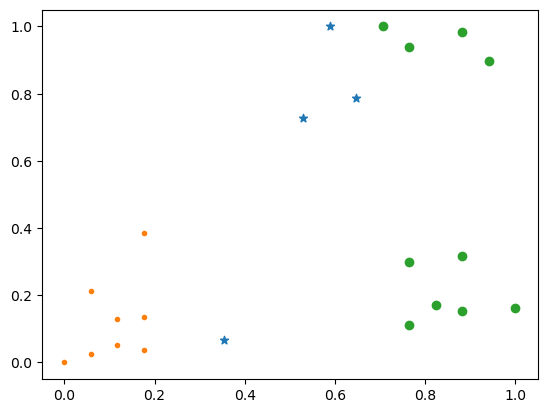

In [47]:
plt.scatter(df0['Age'],df0['Income'],marker='*')
plt.scatter(df1['Age'],df1['Income'],marker='.')
plt.scatter(df2['Age'],df2['Income'])
plt.show()

In [48]:
model.cluster_centers_

array([[0.52941176],
       [0.11029412],
       [0.84117647]])

In [49]:
model.cluster_centers_[:,0]

array([0.52941176, 0.11029412, 0.84117647])

In [57]:
model.cluster_centers_[1]

array([0.11029412])

In [58]:
model.inertia_

0.15562283737024224

In [60]:
sse = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df[['Age','Income']])
    sse.append(model.inertia_)
    

C:\Users\smailey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\smailey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\smailey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\smailey\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [61]:
sse

[5.493999956592008,
 2.1317304647961124,
 0.48259220352300936,
 0.36400718588289455,
 0.28342588370684074,
 0.22330578121250355,
 0.16887732778070813,
 0.1357503708448612,
 0.10807105937861866,
 0.085401357584024]

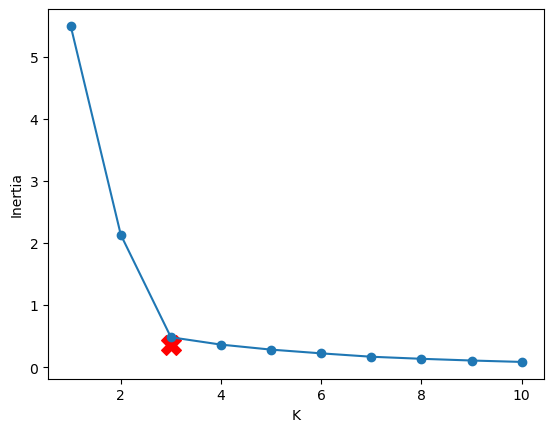

In [66]:
plt.plot(range(1,11),sse,marker = 'o')
plt.scatter(3,sse[3],marker='X',s=200,c='r')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()